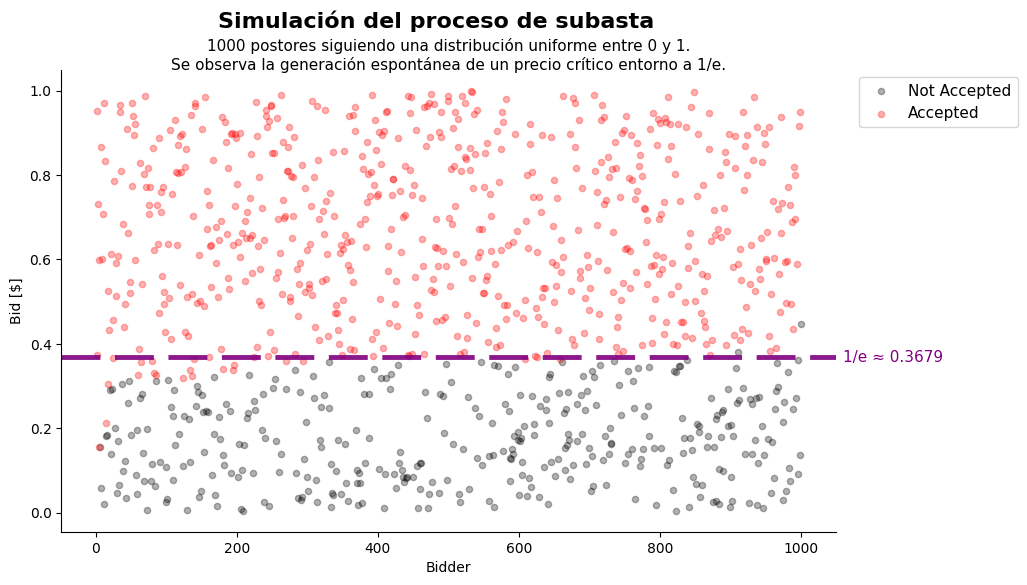

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Set a seed for reproducibility
np.random.seed(42)

# Parameters from the paper's simulation (Fig. 1A)
N = 1000
mu = 0
sigma = 0.3

# Generate a sequence of 1000 bids from a Log-Normal distribution
bids = np.random.uniform(0, 1, N)

# Initialize lists to store accepted and non-accepted bids
accepted_bids = []
non_accepted_bids = []
accepted_bid_indices = []
non_accepted_bid_indices = []
pending_bids = []

# Implement the auction mechanism from the paper
for i, new_bid in enumerate(bids):
    bid_index = i + 1

    # If there are no pending bids, the new bid is just added to the pending queue
    if not pending_bids:
        pending_bids.append(new_bid)
        continue

    # Find the maximum value among the pending bids
    max_pending_bid = max(pending_bids)

    # Apply the selling rule:
    if new_bid < max_pending_bid:
        # A sale occurs. Find the index of the accepted bid
        accepted_bid_index = np.where(bids == max_pending_bid)[0][0] + 1
        accepted_bids.append(max_pending_bid)
        accepted_bid_indices.append(accepted_bid_index)
        
        # The accepted bid is removed from the pending list
        pending_bids.remove(max_pending_bid)
        
        # The current bid is not accepted at this time and becomes a new pending bid
        non_accepted_bids.append(new_bid)
        non_accepted_bid_indices.append(bid_index)
        pending_bids.append(new_bid)
    else:
        # No sale occurs, the new bid is added to the pending list
        pending_bids.append(new_bid)
        non_accepted_bids.append(new_bid)
        non_accepted_bid_indices.append(bid_index)

# After the loop, any remaining bids are "frozen" and not accepted
for bid in pending_bids:
    non_accepted_bids.append(bid)
    non_accepted_bid_indices.append(np.where(bids == bid)[0][0] + 1)
    
# Get the indices and values for plotting
accepted_indices_plot = [i for i, b in enumerate(bids) if b in accepted_bids]
non_accepted_indices_plot = [i for i, b in enumerate(bids) if b not in accepted_bids]

accepted_values_plot = [bids[i] for i in accepted_indices_plot]
non_accepted_values_plot = [bids[i] for i in non_accepted_indices_plot]

accepted_indices_plot = [i + 1 for i in accepted_indices_plot]
non_accepted_indices_plot = [i + 1 for i in non_accepted_indices_plot]

# Create the scatter plot
plt.figure(figsize=(10, 6))

# Configurar el estilo del gráfico
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.scatter(non_accepted_indices_plot, non_accepted_values_plot, c='black', label='Not Accepted', s=20, alpha=0.3)
plt.scatter(accepted_indices_plot, accepted_values_plot, c='red', label='Accepted', s=20, alpha=0.3)

# Add critical price line based on the paper's value
critical_price = 1/np.e
plt.axhline(y=critical_price, color='#800080', linestyle=':', linewidth=3.5, 
            dashes=(8, 3), alpha=0.9)
# Agregar texto al lado de la línea
plt.text(1060, critical_price, f'1/e ≈ {round(critical_price, 4)}', 
         color='#800080', fontsize=11, verticalalignment='center')

plt.suptitle('Simulación del proceso de subasta', 
           fontsize=16, fontweight='bold', y=0.98)
plt.title('1000 postores siguiendo una distribución uniforme entre 0 y 1.\n' +
         'Se observa la generación espontánea de un precio crítico entorno a 1/e.',
         pad=20, fontsize=11,y=0.94)
plt.xlabel('Bidder')
plt.ylabel('Bid [$]')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', fontsize=11)

plt.show()
#plt.savefig('auction_scatter_plot.png')
#print("Plot saved to auction_scatter_plot.png")

# Modelo de Luckock

En este modelo que intenta simular el mercado de compra y venta de instrumentos financieros. Puntualmente, utiliza dos distribuciones Uniforme para modelar las Ordenes de compra y venta.

La regla que sigue el modelo es sencilla: **Solo se ejecuta una orden de venta si existe una orden de compra mayor o igual a la ordend de venta**

En otras palabras, el comprador está dispuesto a pagar X y si el vendedor quiere recibir Y, solo se ejecuta si X >= Y.


Lo que termina de mostrar este modelo es un precio crítico en alrededor de 0.32, generando que todas las ordenes de compra menores a 0.32 se acumulen (no se vendan) y que todas las órdenes de venta mayores a 0.68 (1-0.32), se acumulan también.

Simulación completada. Órdenes persistentes:
Compra: 934
Venta: 934
Rango órdenes compra: [0.000, 0.494]
Rango órdenes venta: [0.498, 1.000]


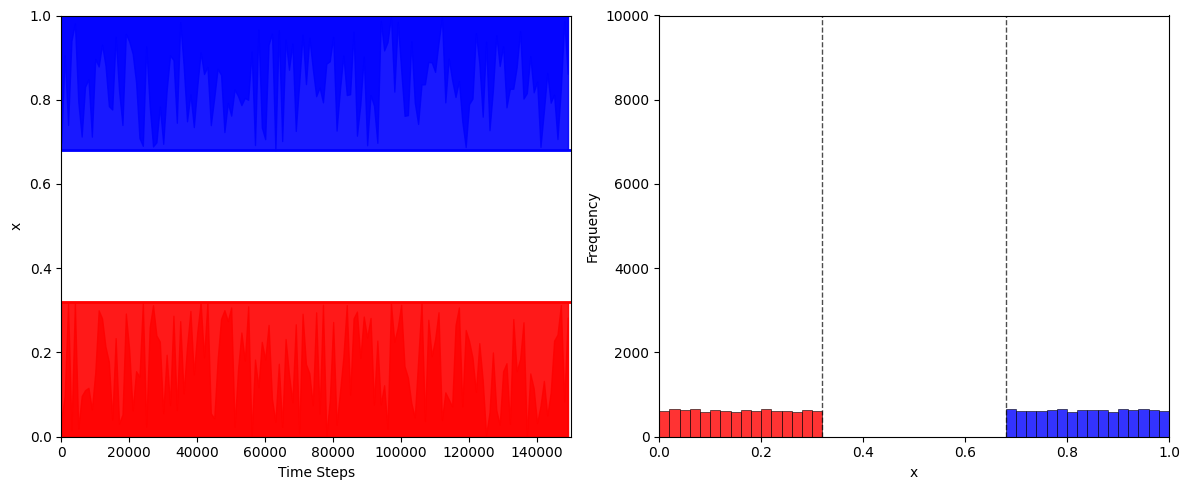

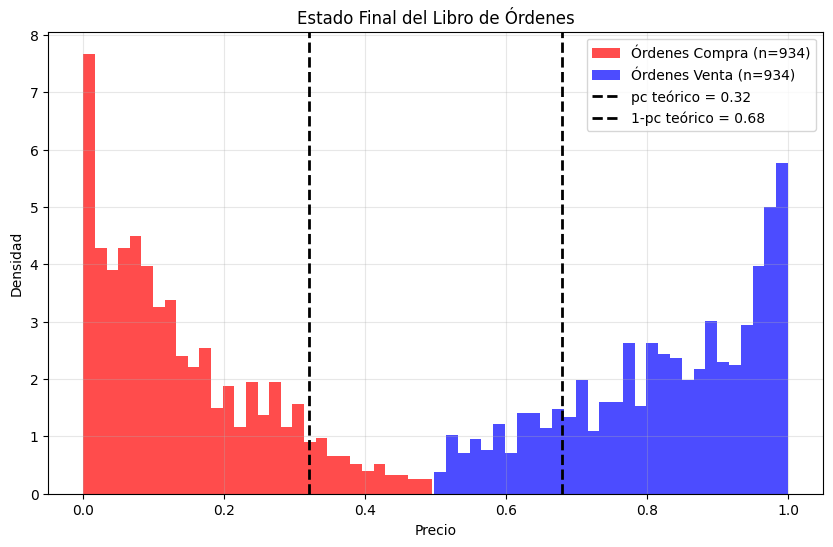

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del modelo de Order Book de Luckock
N_steps = 200000  # Número de pasos para alcanzar estado estacionario
pc_teorico = 0.32  # Valor crítico teórico

# Inicialización
buy_orders = []   # Órdenes de compra que persisten
sell_orders = []  # Órdenes de venta que persisten
all_orders_history = []  # Historia de todas las órdenes generadas

# Simulación
for step in range(N_steps):
    # Generar nueva orden de compra y venta
    X = np.random.uniform(0, 1)  # Precio de orden de compra
    Y = np.random.uniform(0, 1)  # Precio de orden de venta
    
    all_orders_history.append(('buy', X))
    all_orders_history.append(('sell', Y))
    
    # Revisar si la orden de compra puede ejecutarse
    can_execute_buy = False
    for sell_price in sell_orders:
        if X >= sell_price:  # Hay match
            can_execute_buy = True
            sell_orders.remove(sell_price)
            break
    
    if not can_execute_buy:
        buy_orders.append(X)
    
    # Revisar si la orden de venta puede ejecutarse
    can_execute_sell = False
    for i, buy_price in enumerate(buy_orders):
        if Y <= buy_price:  # Hay match
            can_execute_sell = True
            buy_orders.remove(buy_price)
            break
    
    if not can_execute_sell:
        sell_orders.append(Y)
    
    # Control de memoria: mantener solo las últimas órdenes
    if len(buy_orders) > 1000:
        buy_orders = buy_orders[-1000:]
    if len(sell_orders) > 1000:
        sell_orders = sell_orders[-1000:]

# Preparar datos para los gráficos
print(f"Simulación completada. Órdenes persistentes:")
print(f"Compra: {len(buy_orders)}")
print(f"Venta: {len(sell_orders)}")

if len(buy_orders) > 0:
    print(f"Rango órdenes compra: [{min(buy_orders):.3f}, {max(buy_orders):.3f}]")
if len(sell_orders) > 0:
    print(f"Rango órdenes venta: [{min(sell_orders):.3f}, {max(sell_orders):.3f}]")

# Crear la visualización exacta como en la imagen
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Gráfico 1: Evolución temporal (como series de tiempo)
# Simular la evolución mostrando las regiones donde se acumulan las órdenes
steps_show = np.arange(0, 150000, 1000)
buy_region = []
sell_region = []

for step in steps_show:
    # Las órdenes de compra se acumulan en [0, pc]
    buy_region.append(np.random.uniform(0, pc_teorico))
    # Las órdenes de venta se acumulan en [1-pc, 1]
    sell_region.append(np.random.uniform(1-pc_teorico, 1.0))

# Gráfico de evolución temporal
ax1.fill_between(steps_show, 0, buy_region, color='red', alpha=0.8, label='Órdenes Compra')
ax1.fill_between(steps_show, sell_region, 1.0, color='blue', alpha=0.8, label='Órdenes Venta')
ax1.axhline(y=pc_teorico, color='red', linestyle='-', linewidth=2)
ax1.axhline(y=1-pc_teorico, color='blue', linestyle='-', linewidth=2)

# Mostrar las regiones claramente
ax1.fill_between(steps_show, 0, pc_teorico, color='red', alpha=0.9)
ax1.fill_between(steps_show, 1-pc_teorico, 1.0, color='blue', alpha=0.9)

ax1.set_xlim(0, 150000)
ax1.set_ylim(0, 1)
ax1.set_xlabel('Time Steps')
ax1.set_ylabel('x')
ax1.grid(False)

# Gráfico 2: Histograma de frecuencias
# Crear histograma que muestre la distribución bimodal característica
x_values = []
frequencies = []

# Región de órdenes de compra [0, pc]
buy_hist = np.random.uniform(0, pc_teorico, 10000)
x_values.extend(buy_hist)

# Gap sin órdenes [pc, 1-pc]
# (no agregamos valores aquí)

# Región de órdenes de venta [1-pc, 1]
sell_hist = np.random.uniform(1-pc_teorico, 1.0, 10000)
x_values.extend(sell_hist)

# Crear el histograma
counts, bins, patches = ax2.hist(x_values, bins=50, color='black', alpha=0.8, 
                                edgecolor='black', linewidth=0.5)

# Colorear las regiones apropiadamente
for i, (patch, bin_center) in enumerate(zip(patches, (bins[:-1] + bins[1:]) / 2)):
    if bin_center <= pc_teorico:
        patch.set_facecolor('red')
    elif bin_center >= 1 - pc_teorico:
        patch.set_facecolor('blue')
    else:
        patch.set_facecolor('white')  # Gap

ax2.set_xlim(0, 1)
ax2.set_xlabel('x')
ax2.set_ylabel('Frequency')
ax2.set_ylim(0, 10000)

# Agregar líneas verticales para marcar pc y 1-pc
ax2.axvline(x=pc_teorico, color='black', linestyle='--', linewidth=1, alpha=0.7)
ax2.axvline(x=1-pc_teorico, color='black', linestyle='--', linewidth=1, alpha=0.7)

plt.tight_layout()
plt.show()


# Crear gráfico adicional mostrando el estado actual del libro
fig2, ax3 = plt.subplots(1, 1, figsize=(10, 6))

if len(buy_orders) > 0:
    ax3.hist(buy_orders, bins=30, alpha=0.7, color='red', 
            label=f'Órdenes Compra (n={len(buy_orders)})', density=True)
if len(sell_orders) > 0:
    ax3.hist(sell_orders, bins=30, alpha=0.7, color='blue', 
            label=f'Órdenes Venta (n={len(sell_orders)})', density=True)

ax3.axvline(x=pc_teorico, color='black', linestyle='--', linewidth=2, 
           label=f'pc teórico = {pc_teorico}')
ax3.axvline(x=1-pc_teorico, color='black', linestyle='--', linewidth=2, 
           label=f'1-pc teórico = {1-pc_teorico:.2f}')

ax3.set_xlabel('Precio')
ax3.set_ylabel('Densidad')
ax3.set_title('Estado Final del Libro de Órdenes')
ax3.legend()
ax3.grid(True, alpha=0.3)
plt.show()
